# 1. KMeans
- K-평균은 군집화(Clustering)에서 가장 일반적인 알고리즘.
- K-평균은 군집 중심점(centroid)이라는 특정한 임의의지점을 선택해 해당 중심에 가장 가까운 포인트를 선택하는 군집화 기법
- 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행
- 모든 데이터 포인트에서 더이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법
![image](https://user-images.githubusercontent.com/70187490/132672088-ba14937f-0cab-43ad-a0e4-400fb9de96e7.png)

1. 먼저 군집화의 기준이 되는 중심을 구성하려는 군집화 개수 만큼 임의의 위치에 가져다 놓는다.  
전체 데이터를 2개로 준깁화하려면 2개의 중심을 임의의 위치에 가져다 놓음  
( 사실 임의의 위치에 군집 중심점을 가져다 놓으면 반복적인 이동 수행을 너무 많이 해서 수행 시간이 오래 걸리기 때문에 초기화 알고리즘으로 적합한 위치에 중심점을 가져다 놓음)
2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속됨  
위 그림에서는 A, B 데이터가 같은 중심점에 소속되며, C,E,F 데이터가 같은 중심점에 소속됨
3. 이렇게 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동함
위 그림에서 A, B 데이터 포인트의 평균 위치로 중심점이 이동했고, 다른 중심점 역시 C, E, F 데이터 포인트의 평균 위치로 이동하였음
4. 중심점이 이동했기 때문에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속을 변경함  
위 그림에서는 C 데이터가 기존의 중심점보다 더 가까운 중심점으로 변경되었음
5. 다시 중심을 소속된 데이터의 평균 중심으로 이동함  
위 그림에서는 데이터 C가 중심 소속이 변경되면서 두 개의 중심이 모두 이동함
6. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면 군집화를 중료함  
그렇지 않으면 다시 4번 과정을 거쳐서 소속을 변경하고 이 과정을 반복  

<br>

**K-평균의 장점**  
- 일반적인 군집화에서 가장 많이 활용되는 알고리즘
- 알고리즘이 쉽고 간결하다.  

<br>

**K-평균의 단점**
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐  
(이를 위해 PCA로 차원감소를 적용해야 할 수 있음)
- 반복을 수행하는데 반복 횟수가 많을 경우 수행 시간이 느려짐
- 몇개의 군집(Cluster)을 선택해야 할지 가이드하기가 힘듬

# 2. 사이킷런 KMeans 클래스 소개
KMeans 클래스는 다음과 같은 초기화 파라미터를 가지고 있음
```
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_itit=10, max_iter=300, tol=0.0001, 
                             precompute_distances='auto', verbose=0, random_state=None, copy_x=True,
                             n_job=1, algorithm='auto')
```
이 중 중요한 파라미터는 다음과 같음
- KMeans 초기화 파라미터 중 가장 중요한 파라미터는 n_cluster이며, 이는 군집화할 개수, 즉 군집 중심점의 개수를 의미함
- init는 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식을 최초 설정함
- max_iter는 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료함  

<br>

KMeans 객체는 군집화 수행이 완료돼 군집화와 관련된 주요 속성을 알수가 있다. 다음은 이 주요 속성 정보
- labels_: 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_: 각 군집 중심점 좌표(Shape는 [군집 개수, 피처 개수]). 이를 이용하면 군집 중심점 좌표가 어디인지 시각화가 가능

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


붓꽃 데이터 세트를 3개의 그룹으로 군집화
- 이를 위해 n_cluster는 3
- 초기 중심 설정 방식은 디폴트 값인 k-means++
- 최대 반복 횟수도 디폴트 값인 max_iter=300  

으로 설정한 KMeans 객체를 만들고 여기에 fit( )을 수행

In [2]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [3]:
# irisDF의 각 데이터가 어떤 중심에 속하는지를 알기 위한 메소드 .labels_
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [4]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count().to_frame()
iris_result

sepal_length
target cluster              
0      1                  50
1      0                   2
       2                  48
2      0                  36
       2                  14

- 분류타켓 0값인 데이터는 1번 군집으로 잘 그루핑되었음
- Target 1값 데이터는 2개만 2번 군집으로 그루핑 되었고, 나머지 48개는 모두 0번 군집으로 그루핑
- 하지만 Target 2값 데이터는 14개, 36개로 분산되어 그루핑

붓꽃 데이터 세트의 군집화를 시각화  
붓꽃 데이터 세트의 속성이 4개이므로 2차원 평면에 적합하지 않아 PCA를 이용해 4개의 속성을 2개로 차원축소한 뒤에 시각화

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_X'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_X,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


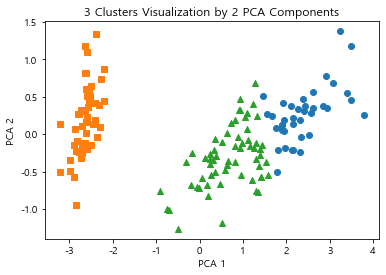

In [6]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o,s,^로 마커표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_X'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_X'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_X'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components');

# 3. 군집화 알고리즘 테스트를 위한 데이터 생성
make_blobs( )와 make_classification( ) API로 군집화 데이터 생성기를 만들 수 있음
- 두 API는 비슷하게 여러 개의 클래스에 해당하는 데이터 세트를 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성 가능
- 둘 중에 어떤 것을 사용하든 큰 차이는 없으나
- make_blobs( )는 개별 군비의 중심점과 표준 편차 제어 기능이 추가되어 있음
- make_classfication( )은 노이즈를 포함한 데이터를 만드는데 유용하게 사용할 수 있음  

<br>

make_blobs( )의 파라미터
- n_samples: 생성할 총 데이터의 개수. 디폴트는 100개
- n_features: 데이터의 피처 개수. 시각화를 목표로 할 경우 2개로 설정해 보통 첫번째 피처는 x좌표, 두번째 피처는 y좌표상에 표현
- cluster: int 값. 예를 들어 3으로 설정하면 군집의 개수를 나타냄. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미함
- cluster_std: 생성될 군집 데이터의 표준 편차를 의미.  
만일 float값 0.8과 같은 형태로 지정하면 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어짐  
[0.9, 1.2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내 데이터의 표준 편차는 0.8, 두번째 군집 내 데이터의 표준편차는 1.2, 세번째 군집 내 데이터의 표준편차는 0.6으로 만듦.  
군집별로 서로 다른 표준편차를 가진 데이터 세트를 만들 때 사용

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [8]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y
clusterDF.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


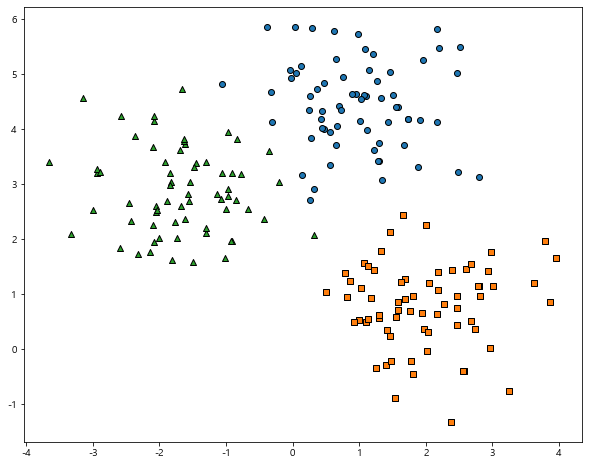

In [13]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값
markers = ['o','s','^']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target == 0, target == 1, target == 2로 scatter plot을 marker별로 생성
plt.figure(figsize=(10, 8))
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker = markers[target])
plt.show()

KMeans 객체에 fit_predict(X)를 수행해 make_blobs( )의 피처 데이터 세트인 X 데이터를 군집화함  
이를 앞에서 구한 clusterDF의 'kmeans_label'칼럼으로 저장  
KMeans 객체의 cluster_centers_ 속성은 개별 군집의 중심 위치 좌표를 나타내기 위해 사용함

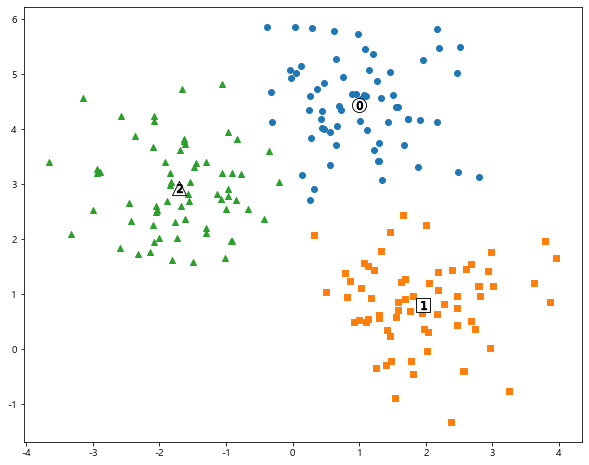

In [19]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^']

plt.figure(figsize=(10, 8))
# 군집된 label 유형별로 iteration하면서 marker별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], marker=markers[label])
    
    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x= center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x= center_x_y[0], y=center_x_y[1], s=70, color='k',
                marker='$%d$' %label)
    
plt.show()

In [18]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


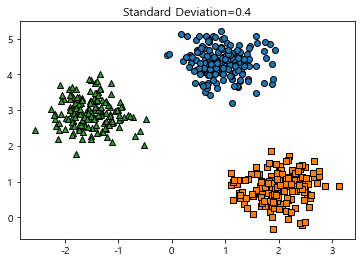

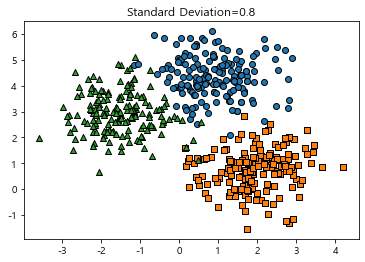

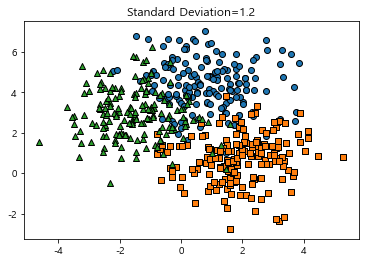

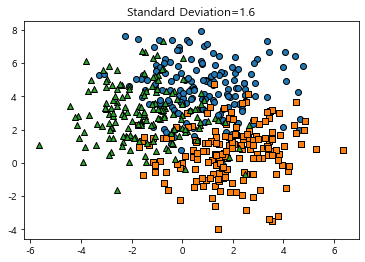

In [29]:
sts = [0.4, 0.8, 1.2, 1.6]

for st in sts:
    X, y = make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=st, random_state=0)
    target_list = np.unique(y)
    markers = ['o','s','^']
    
    clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
    clusterDF['target'] = y
    for target in target_list:
        target_cluster = clusterDF[clusterDF['target']==target]
        plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], marker=markers[target], edgecolor='k')
        plt.title('Standard Deviation='+ str(st))
    plt.show()